# 1.2 - Multilinear Regression

__Input__: Dataset $((x_{11}, x_{12}, \cdots, x_{1n}, y_1), (x_{21}, x_{22}, \cdots, x_{2n}, y_2), \cdots, (x_{N1}, x_{N2}, \cdots, x_{Nn}, y_N))$ with __multiple__ (n) features and a response variable, with $N$ measurements

__Purpose__: Find the "best" linear function $f(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$ that fits the data. 

__Approach__: Usually, minimize the mean squared error between the linear fit and the data points. As in the simple linear regression, just extended to account for more predictors. This is done using vector-matrix notation.

__Assumptions__: That data can be fit by a linear relationship. 

__Hyperparameters__: None. Variations exist by including additional cost terms (Ridge, Lasso) in the optimization.

Any combination $(\beta_0, \beta_1, \beta_2, \cdots, \beta_n)$ leads to a well-defined function which generates "predictions" $\hat{y}_i = f(x_i)$ for any given $\{x_i^j\}$. A residual is the distance between this prediction and the "true" value (in the dataset) $y_i$ and the predicted value $\hat{y}_i$: $r = y_i - \hat{h}_i$. 

Computing the residuals across the whole dataset, computing their squared values, and then averaging them all generates the MSE: $\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2$. This acts as the loss function that is being minimized to find the best choice of parameters.

This minimization can be done analytically to generate closed form solutions for the parameters!

This problem can be re-expressed in vector-matrix notation. Let $X_p = (x_{1p}, x_{2p}, \cdots, x_{np})$ contain all the $n$ features for a given prediction index $p$, with corresponding response $y_p$. First, define a unity vector $\mathcal{I} = (1, ..., 1)$. We collect all the measurements together into a $(n \times (P+1))$ matrix $X = (\mathcal{I}, X_1, \cdots, X_P)$, with the responses in vector $Y = (y_1, \cdots, y_P)^T$, and the coefficients in $\beta = (\beta_0, \beta_1, ..., \beta_P)^T$. Then, we can write the model predictions as $$\hat{f}(X) = \hat{Y} = X \hat{\beta}.$$

To be clear: $X$ is an $(n \times (P+1))$ matrix, $\beta$ is a $(P+1 \times 1)$ column vector, and the product, $\hat{Y}$ is a $(n \times 1)$ column vector.
With this, the MSE becomes $\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^N ||\hat{Y} - X_i^T \hat{\beta}||^2$. The coefficients that minimize the MSE are 
$$\hat{\beta} = (X^T X)^{-1} X^T \hat{Y}.$$

Code: I implement a function that uses the analytical expression for the coefficients, and compare it with the output from scikitlearn. I use this in a very simple synthetic example that follows a multilinear form with some noise. The code is very simply structured and not well documented, really just implemented as simple as possible.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def pad_matrix_with_ones(M):
    """receive a (n, P) matrix M, pad it on the left with ones to return a (n, P+1) matrix to be used in MLR"""
    # Get the number of rows in the matrix
    n = M.shape[0]
    
    # Create a column vector of ones with the same number of rows as the input matrix
    ones_column = np.ones((n, 1))
    
    # Concatenate the column vector of ones with the input matrix horizontally
    padded_M = np.hstack((ones_column, M))
    
    return padded_M


def estimate_coefficients_multilinear(X, Y):
    """ 
    Perform multilinear regression to estimate coefficients for predictors X and response Y

    Parameters:
        X (numpy.ndarray): Feature matrix with shape (n_samples, n_features + 1), where a column of ones is added on the left as intercept
        Y (numpy.ndarray): Response vector with shape (n_samples,)
    
    Returns:
        coeffs (numpy.ndarray): Estimated coefficient array with shape (n_features + 1,) including the intercept term
    """
    XT = np.transpose(X)
    coeffs = np.linalg.inv(XT @ X) @ XT @ Y
    return coeffs

def linear_regression_estimate(X, beta):
    return X @ beta

def multilinear_regression_coeffs_scikit(X, y):
    """
    Perform linear regression analysis on the given dataset.
    
    Parameters:
    X (array-like): Independent variable.
    y (array-like): Dependent variable.
    
    Returns:
    slope (float): Slope of the fitted line.
    intercept (float): Intercept of the fitted line.
    """
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Get the slope and intercept of the fitted line
    coeffs = [model.intercept_] + list(model.coef_)

    y_pred = model.predict(X)

    
    return y_pred, coeffs


In [6]:
def generate_linear_noisy_data(num_points, x_amp, noise_strength, coefficients):
    """ given a vector of n amplitudes, generate a multilinear response y = intercept + coefficients """
    # Set random seed for reproducibility
    np.random.seed(1)
    
    # Generate random x values
    num_feats = len(x_amp)
    X = np.zeros((num_points, num_feats))
    for i in range(0, num_feats):
        X[:, i] = x_amp[i] * np.random.rand(num_points)

    X_padded = pad_matrix_with_ones(X)
    
    # Generate y values using a linear relationship with noise
    y_true = X_padded @ coefficients

    # Generate random noise for y values
    noise = noise_strength * np.random.randn(num_points)
    
    y_noise = y_true + noise
    return X, X_padded, y_true, y_noise

# Generate example
num_points = 50
noise_strength = 1
#x_amp = (10, 5, 1)
#coefficients = (2, 3, 5, 10) #intercept and slopes
x_amp = (10, 5)
coefficients = (2, 3, 5) #intercept and slopes


X, X_padded, Y_true, Y = generate_linear_noisy_data(num_points, x_amp, noise_strength, coefficients)

Y_true_2 = 2 + 3 * X[:,0] + 5 * X[:,1]
print(max(X[:,0]), min(X[:,0]))


9.888610889064948 0.0011437481734488664


In [4]:
est_coeffs = estimate_coefficients_multilinear(X_padded, Y)
y_pred = linear_regression_estimate(X_padded, est_coeffs)
y_pred_scikit, est_coeffs_scikit = multilinear_regression_coeffs_scikit(X, Y)
print(f'Linear coefficients estimated to be: \n {est_coeffs} \n Estimated by scikit: \n {est_coeffs_scikit} \nActual values: \n {coefficients}')
print(f'Predicted responses are the same: {np.allclose(y_pred, y_pred_scikit, atol=0.01)}')

Linear coefficients estimated to be: 
 [2.51568297 2.961651   4.88716632] 
 Estimated by scikit: 
 [2.515682971504905, 2.9616509983189925, 4.887166315295157] 
Actual values: 
 (2, 3, 5)
Predicted responses are the same: True


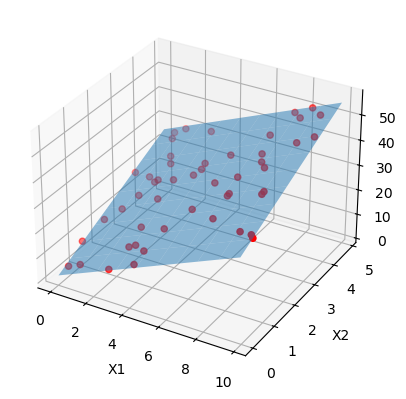

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_multilinear(X, Y, coeffs):
    """
    Scatter plot the predicted points and plot the 'true' linear plane.
    """
    # Plot the data and the plane
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the data points
    X1 = X[:, 1]
    X2 = X[:, 2]
    ax.scatter(X1, X2, Y, c='r', marker='o')
    
    # Create a meshgrid for the plane
    x1_plane = np.linspace(min(X1), max(X1), 10)
    x2_plane = np.linspace(min(X2), max(X2), 10)
    X1_plane, X2_plane = np.meshgrid(x1_plane, x2_plane)
    Y_plane = coeffs[0] + coeffs[1]*X1_plane + coeffs[2]*X2_plane
    
    # Plot the plane
    ax.plot_surface(X1_plane, X2_plane, Y_plane, alpha=0.5)
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return fig 

fig = plot_multilinear(X_padded, y_pred, coefficients)
plt.show()


## With gradient descent

In [18]:

import numpy as np

#def pad_matrix_with_ones(M):
#    # ... (Same as your provided implementation) 

#def generate_linear_noisy_data(num_points, x_amp, noise_strength, coefficients):
#    # ... (Same as your provided implementation) 

def predict(X, weights):
    """Predicts the target variable using the given weights.
    Args:
        X: The input feature matrix (with a column of ones).
        weights: The coefficients of the regression (including intercept).

    Returns:
        The predicted response variable.
    """
    return X @ weights

def mean_squared_error(y_true, y_predicted):
    """Calculates the mean squared error."""
    return np.mean((y_true - y_predicted) ** 2)


def multilinear_regression(X, y, learning_rate=0.01, num_iterations=1000):
    """Implements multiple linear regression using gradient descent.

    Args:
        X: The input feature matrix (with a column of ones).
        y: The target output values.

    Returns:
        A tuple containing:
            - weights: The learned coefficients.
    """    
    # Initialize weights randomly
    weights = np.random.randn(X.shape[1])
    
    # Perform gradient descent
    for _ in range(num_iterations):
        y_predicted = predict(X, weights)
        errors = y_predicted - y
        gradient = (X.T @ errors) / X.shape[0]
        weights -= learning_rate * gradient
    
    return weights

# Example usage: Using the data generation process from before
num_points = 50
noise_strength = 0.1
x_amp = (10, 5)
coefficients = (2, 3, 5) #intercept and slopes

X, X_padded, Y_true, Y = generate_linear_noisy_data(num_points, x_amp, noise_strength, coefficients)

weights = multilinear_regression(X_padded, Y, num_iterations=10000)
print("Learned Weights:", weights) 

# Make predictions using the learned weights.
predictions = predict(X_padded, weights)

# Calculate the MSE to evaluate performance 
mse = mean_squared_error(Y, predictions)
print('Mean Squared Error:', mse)

print(f'Linear coefficients estimated to be: \n {weights} \nActual values: \n {coefficients}')


Learned Weights: [2.05156785 2.99616513 4.98871672]
Mean Squared Error: 0.005833142258033655
Linear coefficients estimated to be: 
 [2.05156785 2.99616513 4.98871672] 
Actual values: 
 (2, 3, 5)
